# Spatiotemporal patterns of drug activity in Chicago

### Luna Zhiyue Xia, Dec 2019

## Abstract

## 1. Introduction


In my previous and ongoing research, I have investigated the spatiotemporal patterns of reported incidents of narcotics-related crime (drug arrests) in Chicago from 2016 to 2018. One important assumption for this research was drug arrests data can be used as a proxy to probe the patterns of drug activities.

The following figure shows the LISA results of drug arrests. Two major hotspots are identified in the north and south regions.

In [ ]:
# Insert the figure here

In this Final project,....

## 2. Read, tidy, and explore the Medical Examiner Case Archive dataset
Medical Examiner Case Archive dataset was accessed from [Cook County, IL open data](https://hub-cookcountyil.opendata.arcgis.com/datasets/4f7cc9f13542463c89b2055afd4a6dc1_0/data?page=3158). The dataset records the information from deaths starting in August 2014 to the accessed date (Oct 1st, 2019).

In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv
mecr_gdf = gpd.read_file('data/Medical_Examiner_Case_Archive_2014_to_present.shp')
mecr_gdf.head(2)

OBJECTID    CASENUMBER                INCIDENT_D           INCIDENT_S  \
0     50827  ME2016-02747  2016-06-03T19:20:00.000Z     96 W. HICKORY ST   
1     50828  ME2016-02871  2016-06-11T22:32:00.000Z  606 HANDOVER STREET   

        INCIDENT_C                DEATH_DATE   AGE GENDER   RACE LATINO  ...  \
0  CHICAGO HEIGHTS  2016-06-03T19:43:00.000Z  64.0   Male  White    YES  ...   
1  CHICAGO HEIGHTS  2016-06-11T22:57:00.000Z  15.0   Male  Black     NO  ...   

  PRIMARYC_2 SECONDARYC GUNRELATED OPIOIDS COLD_RELAT HEAT_RELAT  INCIDENT_Z  \
0       None       None       None     1.0         NO         NO       60411   
1       None       None          1     NaN         NO         NO       60411   

        RESIDENCE_ RESIDENC_1                                     geometry  
0  Chicago Heights      60411  POINT (1172909.132347077 1760940.581165574)  
1  Chicago Heights      60411                                         None  

[2 rows x 23 columns]

In [3]:
mecr_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31102 entries, 0 to 31101
Data columns (total 23 columns):
OBJECTID      31102 non-null int64
CASENUMBER    31102 non-null object
INCIDENT_D    30887 non-null object
INCIDENT_S    30853 non-null object
INCIDENT_C    30180 non-null object
DEATH_DATE    31053 non-null object
AGE           30876 non-null float64
GENDER        30958 non-null object
RACE          30915 non-null object
LATINO        31102 non-null object
MANNER        30857 non-null object
PRIMARYCAU    31063 non-null object
PRIMARYC_1    540 non-null object
PRIMARYC_2    61 non-null object
SECONDARYC    8397 non-null object
GUNRELATED    4089 non-null object
OPIOIDS       4767 non-null float64
COLD_RELAT    31102 non-null object
HEAT_RELAT    31102 non-null object
INCIDENT_Z    30426 non-null object
RESIDENCE_    30024 non-null object
RESIDENC_1    30119 non-null object
geometry      27668 non-null object
dtypes: float64(2), int64(1), object(20)
memory usage: 5.5+ MB

In [4]:
# Based on the metadata, change the column name to more intuitive names
mecr_gdf.columns = ['OBJECTID ', 'CASENUMBER', 'INCIDENT_DATE', 'INCIDENT_STREET', 'INCIDENT_CITY',
       'DEATH_DATE', 'AGE', 'GENDER','RACE','LATINO','MANNER', 'PRIMARYCAUSE', 'PRIMARYCAUSE_LINEB',
        'PRIMARYCAUSE_LINEC', 'SECONDARYCAUSE', 'GUNRELATED', 'OPIOIDS', 'COLD_RELATED', 'HEAT_RELATED',
        'INCIDENT_ZIP', 'RESIDENCE_CITY', 'RESIDENCE_ZIP','geometry']

In [5]:
opioids_gdf = mecr_gdf.loc[(mecr_gdf['OPIOIDS'] == 1) & (mecr_gdf['INCIDENT_CITY'] == 'CHICAGO') ]

In [6]:
pd.set_option('display.max_colwidth', 1000) # show more information
opioids_gdf[['DEATH_DATE', 'AGE', 'GENDER','RACE','LATINO','MANNER','PRIMARYCAUSE']].sample(2)

DEATH_DATE   AGE GENDER   RACE LATINO    MANNER  \
14658  2016-12-15T17:23:00.000Z  39.0   Male  Black     NO  ACCIDENT   
9343   2016-01-22T21:38:00.000Z  28.0   Male  White     NO  ACCIDENT   

                                                          PRIMARYCAUSE  
14658  COMBINED HEROIN, FENTANYL, ACRYL FENTANYL, AND ETHANOL TOXICITY  
9343                                             ACUTE HEROIN TOXICITY

In [7]:
opioids_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3171 entries, 676 to 31041
Data columns (total 23 columns):
OBJECTID              3171 non-null int64
CASENUMBER            3171 non-null object
INCIDENT_DATE         3159 non-null object
INCIDENT_STREET       3160 non-null object
INCIDENT_CITY         3171 non-null object
DEATH_DATE            3171 non-null object
AGE                   3166 non-null float64
GENDER                3171 non-null object
RACE                  3171 non-null object
LATINO                3171 non-null object
MANNER                3171 non-null object
PRIMARYCAUSE          3171 non-null object
PRIMARYCAUSE_LINEB    10 non-null object
PRIMARYCAUSE_LINEC    4 non-null object
SECONDARYCAUSE        501 non-null object
GUNRELATED            0 non-null object
OPIOIDS               3171 non-null float64
COLD_RELATED          3171 non-null object
HEAT_RELATED          3171 non-null object
INCIDENT_ZIP          3168 non-null object
RESIDENCE_CITY        3066 non

In [8]:
# read Chicago block group boundaries
chicago_bg = gpd.read_file('data/ChicagoPoly.shp')

In [9]:
chicago_bg.head(2)

GEOID10           GEOID_Data  \
0  170438400002  15000US170438400002   
1  170312427001  15000US170312427001   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  geometry  
0  POLYGON ((-9787284.824242949 5160085.317449529, -9788060.556730891 5160032.785712422, -9788385.49828635 5160010.917780374, -9788397.075584127 5160010.168849842, -9788443.607033081 5160017.208570099, -9788461.86349258 5160019.754849234, -9788473.774706801 5160021.552174172, -9788474.776533429 5160021.701994051, -9788497.263179861 5160024.997141015, -9788516.744089775 5160024.248194279, -9788535.111736123 5160023.649048661, -9788544.128626598 5160023.349621235, -9788813.187815715 5160013.014690189, -9789023.692886021 5160004.627040246, -9789067.107480397 5160002.979493089, -9789258.577081205 5159995.490497628, -9789271.490109511 5159995.041064349, -9789277.167483201 5159995.190857844, -9789280.061799172 5159995.190898792, -9789285.182440229 5159995.190854642, -9789291.750306172 5159995.190894044, -9789317.687774735 5159995.190945681, -9789323.47627309 5159995.190866526, -9789323.256242357 5159996.369000004, -9789318.324600004 5159996.369000004, -9789292.3872 5159996.369000004, -97892...  
1  POLYGON ((-9762352.949899999 5145362.887900001, -9762380.55719999 5145362.887900001, -9762418.517199993 5145362.887900001, -9762463.601599993 5145362.289699998, -9762490.713939719 5145362.143469326, -9762491.320099996 5145362.140199996, -9762518.370799994 5145361.691399997, -9762599.411399996 5145360.495100001, -9762625.974356806 5145360.202596489, -9762626.573400002 5145360.196, -9762643.271299999 5145359.896899998, -9762693.253699997 5145359.298600003, -9762710.063100005 5145359.148999996, -9762711.579178695 5145359.125521678, -9762748.691000003 5145358.5508, -9762781.975400003 5145358.251699999, -9762864.797199994 5145356.008500005, -9762903.536299998 5145354.961800002, -9762906.096699994 5145354.812200003, -9762913.889099993 5145354.662699995, -9762916.560700001 5145354.662699995, -9762925.647957411 5145354.382054176, -9762926.2455 5145354.3636, -9762955.522600004 5145354.064499998, -9762964.718081184 5145354.064499998, -9762965.318699999 5145354.064499998, -9762965.986600002 5...

In [10]:
print(chicago_bg.crs, opioids_gdf.crs)

{'init': 'epsg:3857'} {'init': 'epsg:3435'}


In [11]:
# conver two layers to the same proejction
opioids_gdf = opioids_gdf[opioids_gdf.geometry.notnull()] #remove some points withou geometry
opioids_gdf_prj = opioids_gdf.to_crs({'init': 'epsg:3857'})

In [12]:
import matplotlib.pyplot as plt

(-9791635.14907553, -9740778.347421844, 5083327.894810944, 5168308.332257727)

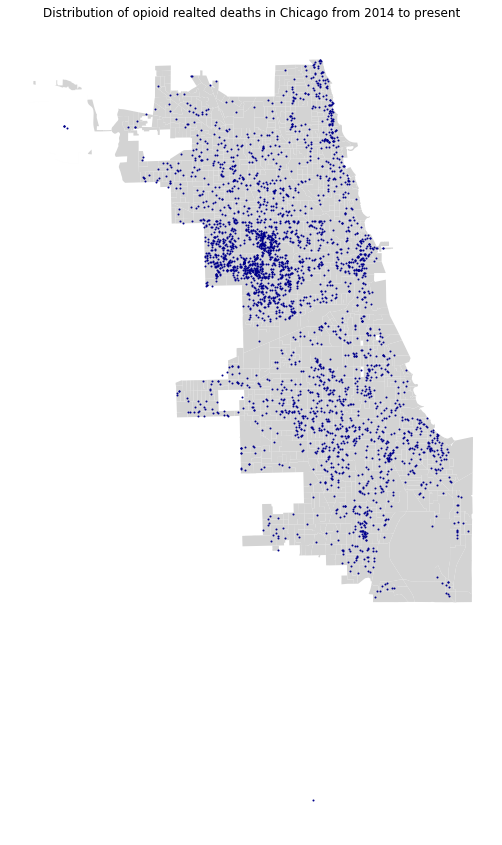

In [13]:
# plot chicago block group boundaries and points of death
fig, ax = plt.subplots(figsize=(15,15))
chicago_bg.plot(ax=ax,color='lightgray',)
opioids_gdf_prj.plot(markersize=1, color='darkblue',ax=ax)

ax.set_title('Distribution of opioid realted deaths in Chicago from 2014 to present')
ax.axis('off')

In [14]:
deathcount = gpd.sjoin(chicago_bg, opioids_gdf_prj, how='left')
deathcount = deathcount.groupby('GEOID_Data').size().reset_index().fillna(0)
deathcount.columns = ['GEOID_Data','DEATH']

In [15]:
deathcount

GEOID_Data  DEATH
0     15000US170310101001      3
1     15000US170310101002      2
2     15000US170310101003      2
3     15000US170310102011      1
4     15000US170310102012      3
...                   ...    ...
2197  15000US170318439002      1
2198  15000US170318439003      1
2199  15000US170318439004      1
2200  15000US170318439005      1
2201  15000US170438400002      1

[2202 rows x 2 columns]

In [16]:
chicago_opioids = chicago_bg.merge(deathcount, on = 'GEOID_Data', how='left')

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
chicago_opioids.plot(column='DEATH',  k=5, cmap='Greens', scheme='user_defined',
                     classification_kwds={'bins':[2, 5, 10,27]}, legend=True, ax=ax)

ax.set_title('Choropleth map: number of deaths related to opioids in block groups in Chicago from 2014 to present')
ax.axis('off')

(-9791635.14907553, -9740778.347421844, 5105013.1333303265, 5167275.701852042)

In [33]:
import pysal.lib as lp
import pysal.explore.esda as esda
from pysal.viz.splot import esda as esdaplot

In [34]:
wq =  lp.weights.Queen.from_dataframe(chicago_opioids)
wq.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 489, ' is an island (no neighbors)')
('WARNING: ', 1405, ' is an island (no neighbors)')


(<Figure size 1080x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018AABB64588>,
       dtype=object))

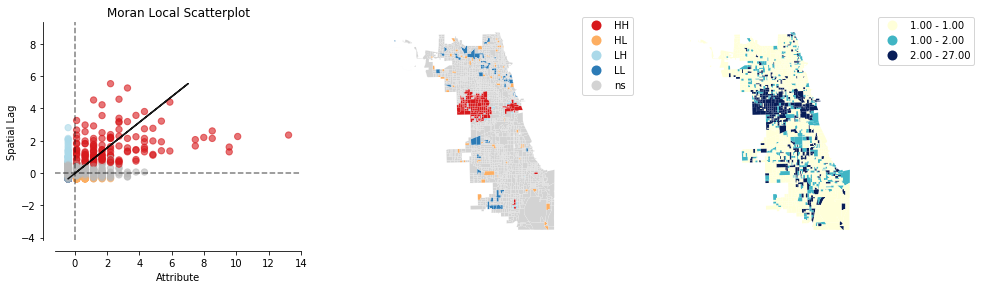

In [35]:
lisa = esda.Moran_Local(chicago_opioids['DEATH'], wq)
esdaplot.plot_local_autocorrelation(lisa, chicago_opioids, 'DEATH')

## Bivariate ESDA of opioid death and drug arrest

In [28]:
# read arrest data
chicago_arrest = pd.read_csv('data/DrugArrestCount.csv')
chicago_arrest.columns = ['FID','GEOID','GEOID_Data','arrest_per1000']
chicago_arrest.head(2)

FID         GEOID           GEOID_Data  arrest_per1000
0    0  170312909001  15000US170312909001      126.203003
1    1  170312909002  15000US170312909002      101.860001

The coloumn 'arrest_per100' is a caculated result from my previous efforts that represents the total frequency of drug arrests per 1000 population occured in a block group between 2016 and 2018.

In [32]:
# join drug arrest data into the polygon data that includes death data
chicago_death_arrest = chicago_opioids.merge(chicago_arrest, on = 'GEOID_Data', how='left')
chicago_death_arrest[['GEOID_Data','DEATH','arrest_per1000']].head(5)

GEOID_Data  DEATH  arrest_per1000
0  15000US170438400002      1         0.00000
1  15000US170312427001      2         5.36033
2  15000US170312426004      2         2.01884
3  15000US170312426003      2         2.09351
4  15000US170312426002      2         1.83262

In [38]:
# global bivariate Moran's I
mbi = esda.moran.Moran_BV(chicago_death_arrest['DEATH'],chicago_death_arrest['arrest_per1000'], wq)
print(mbi.I, mbi.p_sim)

0.42322052845350544 0.001


In [39]:
# Bivariate Local Moran Statistics 
lmbi = esda.moran.Moran_Local_BV(chicago_death_arrest['DEATH'],
                                 chicago_death_arrest['arrest_per1000'], wq)

In [45]:
lisa = esda.Moran_Local_BV(chicago_death_arrest['DEATH'],
                           chicago_death_arrest['arrest_per1000'], wq)
esdaplot.plot_local_autocorrelation(lisa, chicago_opioids, 'DEATH')

(<Figure size 1080x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018AAD6CE2E8>,
       dtype=object))

## GWR and MGWR

In [73]:
# read the dataset which include predictor infomation
ACS = pd.read_csv('data/2017ACS.csv')
KeyLoc = pd.read_csv('data/KeyLocations.csv')
BuitEnv = pd.read_csv('data/BuiltEnv.csv')

In [117]:
chicago_variable1 = chicago_death_arrest.merge(BuitEnv, on = 'GEOID_Data', how='left')
chicago_variable2 = chicago_variable1.merge(ACS, on = 'GEOID_Data', how='left')
chicago_variable = chicago_variable2.merge(KeyLoc, on = 'GEOID_Data', how='left')

In [98]:
list_var = chicago_variable.columns
print(*list_var, sep=", ")

GEOID10_x, GEOID_Data, geometry, DEATH, FID_x, GEOID, arrest_per1000, FID_y, GEOID10_y, P_WRKAGE, AUTOOWN0, PCT_AO0, AUTOOWN1, PCT_AO1, AUTOOWN2P, PCT_AO2P, WORKERS, R_LOWWAGEW, R_MEDWAGEW, R_HIWAGEWK, R_PCTLOWWA, EMPTOT, E5_RET10, E5_OFF10, E5_IND10, E5_SVC10, E5_ENT10, E8_RET10, E8_OFF10, E8_IND10, E8_SVC10, E8_ENT10, E8_ED10, E8_HLTH10, E8_PUB10, E_FEDT10, E_FEDRET10, E_FEDOFF10, E_FEDIND10, E_FEDSVC10, E_FEDENT10, E_LOWWAGEW, E_MEDWAGEW, E_HIWAGEWK, E_PCTLOWWA, AC_TOT, AC_WATER, AC_LAND, AC_UNPR, D1A, D1B, D1C, D1C5_Ret10, D1C5_Off10, D1C5_Ind10, D1C5_Svc10, D1C5_Ent10, D1C8_Ret10, D1C8_Off10, D1C8_Ind10, D1C8_Svc10, D1C8_Ent10, D1C8_Ed10, D1C8_Hlth1, D1C8_Pub10, D1D, D1_flag, D2A_JPHH, D2B_E5MIX, D2B_E5MIXA, D2B_E8MIX, D2B_E8MIXA, D2A_EPHHM, D2C_TRPMX1, D2C_TRPMX2, D2C_TRIPEQ, D2R_JOBPOP, D2R_WRKEMP, D2A_WRKEMP, D2C_WREMIX, D3a, D3aao, D3amm, D3apo, D3b, D3bao, D3bmm3, D3bmm4, D3bpo3, D3bpo4, D4a, D4b025, D4b050, D4c, D4d, D5ar, D5ae, D5br, D5br_Flag, D5be, D5be_Flag, D5cr, D5cri,

In [164]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from pysal.model.mgwr.gwr import GWR, MGWR
from pysal.model.mgwr.sel_bw import Sel_BW
from pysal.model.mgwr.utils import compare_surfaces, truncate_colormap, shift_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [165]:
def compare(data, var1, var2, gwr_t, gwr_bw, mgwr_t, mgwr_bw, name, kwargs1, kwargs2):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
    ax0 = axes[0]
    ax0.set_title('GWR ' + name + ' Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
    ax1 = axes[1]
    ax1.set_title('MGWR ' + name + ' Surface (BW: ' + str(mgwr_bw) +')', fontsize=40)

    #Set color map
    cmap = plt.cm.seismic

    #Find min and max values of the two combined datasets
    gwr_min = data[var1].min()
    gwr_max = data[var1].max()
    mgwr_min = data[var2].min()
    mgwr_max = data[var2].max()
    vmin = np.min([gwr_min, mgwr_min])
    vmax = np.max([gwr_max, mgwr_max])

    #If all values are negative use the negative half of the colormap
    if (vmin < 0) & (vmax < 0):
        cmap = truncate_colormap(cmap, 0.0, 0.5)
    #If all values are positive use the positive half of the colormap
    elif (vmin > 0) & (vmax > 0):
        cmap = truncate_colormap(cmap, 0.5, 1.0)
    #Otherwise, there are positive and negative values so the colormap so zero is the midpoint
    else:
        cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

    #Create scalar mappable for colorbar and stretch colormap across range of data values
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

    #Plot GWR parameters
    data.plot(var1, cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **kwargs1)
    if (gwr_t == 0).any():
        data[gwr_t == 0].plot(color='lightgrey', ax=ax0, **kwargs2)

    #Plot MGWR parameters
    data.plot(var2, cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **kwargs1)
    if (mgwr_t == 0).any():
        data[mgwr_t == 0].plot(color='lightgrey', ax=ax1, **kwargs2)

    #Set figure options and plot 
    fig.tight_layout()    
    fig.subplots_adjust(right=0.9)
    cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.tick_params(labelsize=50) 
    ax0.get_xaxis().set_visible(False)
    ax0.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.show()

In [166]:
def compare(data, var1, var2, gwr_t, gwr_bw, mgwr_t, mgwr_bw, name, kwargs1, kwargs2):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
    ax0 = axes[0]
    ax0.set_title('GWR ' + name + ' Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
    ax1 = axes[1]
    ax1.set_title('MGWR ' + name + ' Surface (BW: ' + str(mgwr_bw) +')', fontsize=40)

    #Set color map
    cmap = plt.cm.seismic

    #Find min and max values of the two combined datasets
    gwr_min = data[var1].min()
    gwr_max = data[var1].max()
    mgwr_min = data[var2].min()
    mgwr_max = data[var2].max()
    vmin = np.min([gwr_min, mgwr_min])
    vmax = np.max([gwr_max, mgwr_max])

    #If all values are negative use the negative half of the colormap
    if (vmin < 0) & (vmax < 0):
        cmap = truncate_colormap(cmap, 0.0, 0.5)
    #If all values are positive use the positive half of the colormap
    elif (vmin > 0) & (vmax > 0):
        cmap = truncate_colormap(cmap, 0.5, 1.0)
    #Otherwise, there are positive and negative values so the colormap so zero is the midpoint
    else:
        cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

    #Create scalar mappable for colorbar and stretch colormap across range of data values
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

    #Plot GWR parameters
    data.plot(var1, cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **kwargs1)
    if (gwr_t == 0).any():
        data[gwr_t == 0].plot(color='lightgrey', ax=ax0, **kwargs2)

    #Plot MGWR parameters
    data.plot(var2, cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **kwargs1)
    if (mgwr_t == 0).any():
        data[mgwr_t == 0].plot(color='lightgrey', ax=ax1, **kwargs2)

    #Set figure options and plot 
    fig.tight_layout()    
    fig.subplots_adjust(right=0.9)
    cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.tick_params(labelsize=50) 
    ax0.get_xaxis().set_visible(False)
    ax0.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.show()

In [150]:
chicago_variable['PBachelorHigher'] = chicago_variable['PBachelorHigher'].replace('#DIV/0!','0')
chicago_variable['PBachelorHigher'] = chicago_variable['PBachelorHigher'].astype(float)

y = chicago_variable['arrest_per1000'].values.reshape((-1,1))
X = chicago_variable[['VacLot','ParkingLot','PBachelorHigher','Pct_LoMeWg','D5ar'
]].values

In [151]:
u = chicago_variable.centroid.x
v = chicago_variable.centroid.y
coords = list(zip(u,v))

In [153]:
#Instantiate bandwidth selection object
selector = Sel_BW(coords, y, X)

#Default golden section search using AICc criterion
bw = selector.search()
print(bw)

#Interval search using AICc criterion 
bw = selector.search(search_method='interval', interval=2, bw_min=101, bw_max=150)
print(bw)

109.0
109


In [127]:
#Calibrate GWR using standardized data

gwr_selector = Sel_BW(coords, y, X)
gwr_bw = gwr_selector.search()
print(gwr_bw)
gwr_model = GWR(coords, y, X, gwr_bw)
gwr_results = gwr_model.fit()
#Prepare GWR results for mapping

#Add GWR parameters to GeoDataframe
chicago_variable['gwr_intercept'] = gwr_results.params[:,0]
chicago_variable['gwr_VacLot'] = gwr_results.params[:,1]
chicago_variable['gwr_ParkingLot'] = gwr_results.params[:,2]
chicago_variable['gwr_PBachelorHigher'] = gwr_results.params[:,3]
chicago_variable['gwr_Pct_LoMeWg'] = gwr_results.params[:,4]
chicago_variable['gwr_D5ar'] = gwr_results.params[:,5]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t = gwr_results.filter_tvals()

109.0


In [168]:
#Calibrate MGWR model
from pysal.model.mgwr.gwr import GWR, MGWR

mgwr_selector = Sel_BW(coords, y, X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[101,101,101,101,101,101],
                               multi_bw_max=[150,150,150,150,150,150])
print(mgwr_bw)
mgwr_results = MGWR(coords, y, X, mgwr_selector).fit()


[109. 149. 139. 149. 109. 102.]


In [169]:
#Prepare MGWR results for mapping

#Add MGWR parameters to GeoDataframe
chicago_variable['mgwr_intercept'] = mgwr_results.params[:,0]
chicago_variable['mgwr_VacLot'] = mgwr_results.params[:,1]
chicago_variable['mgwr_ParkingLot'] = mgwr_results.params[:,2]
chicago_variable['mgwr_PBachelorHigher'] = mgwr_results.params[:,3]
chicago_variable['mgwr_Pct_LoMeWg'] = mgwr_results.params[:,4]
chicago_variable['mgwr_D5ar'] = mgwr_results.params[:,5]


#Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()

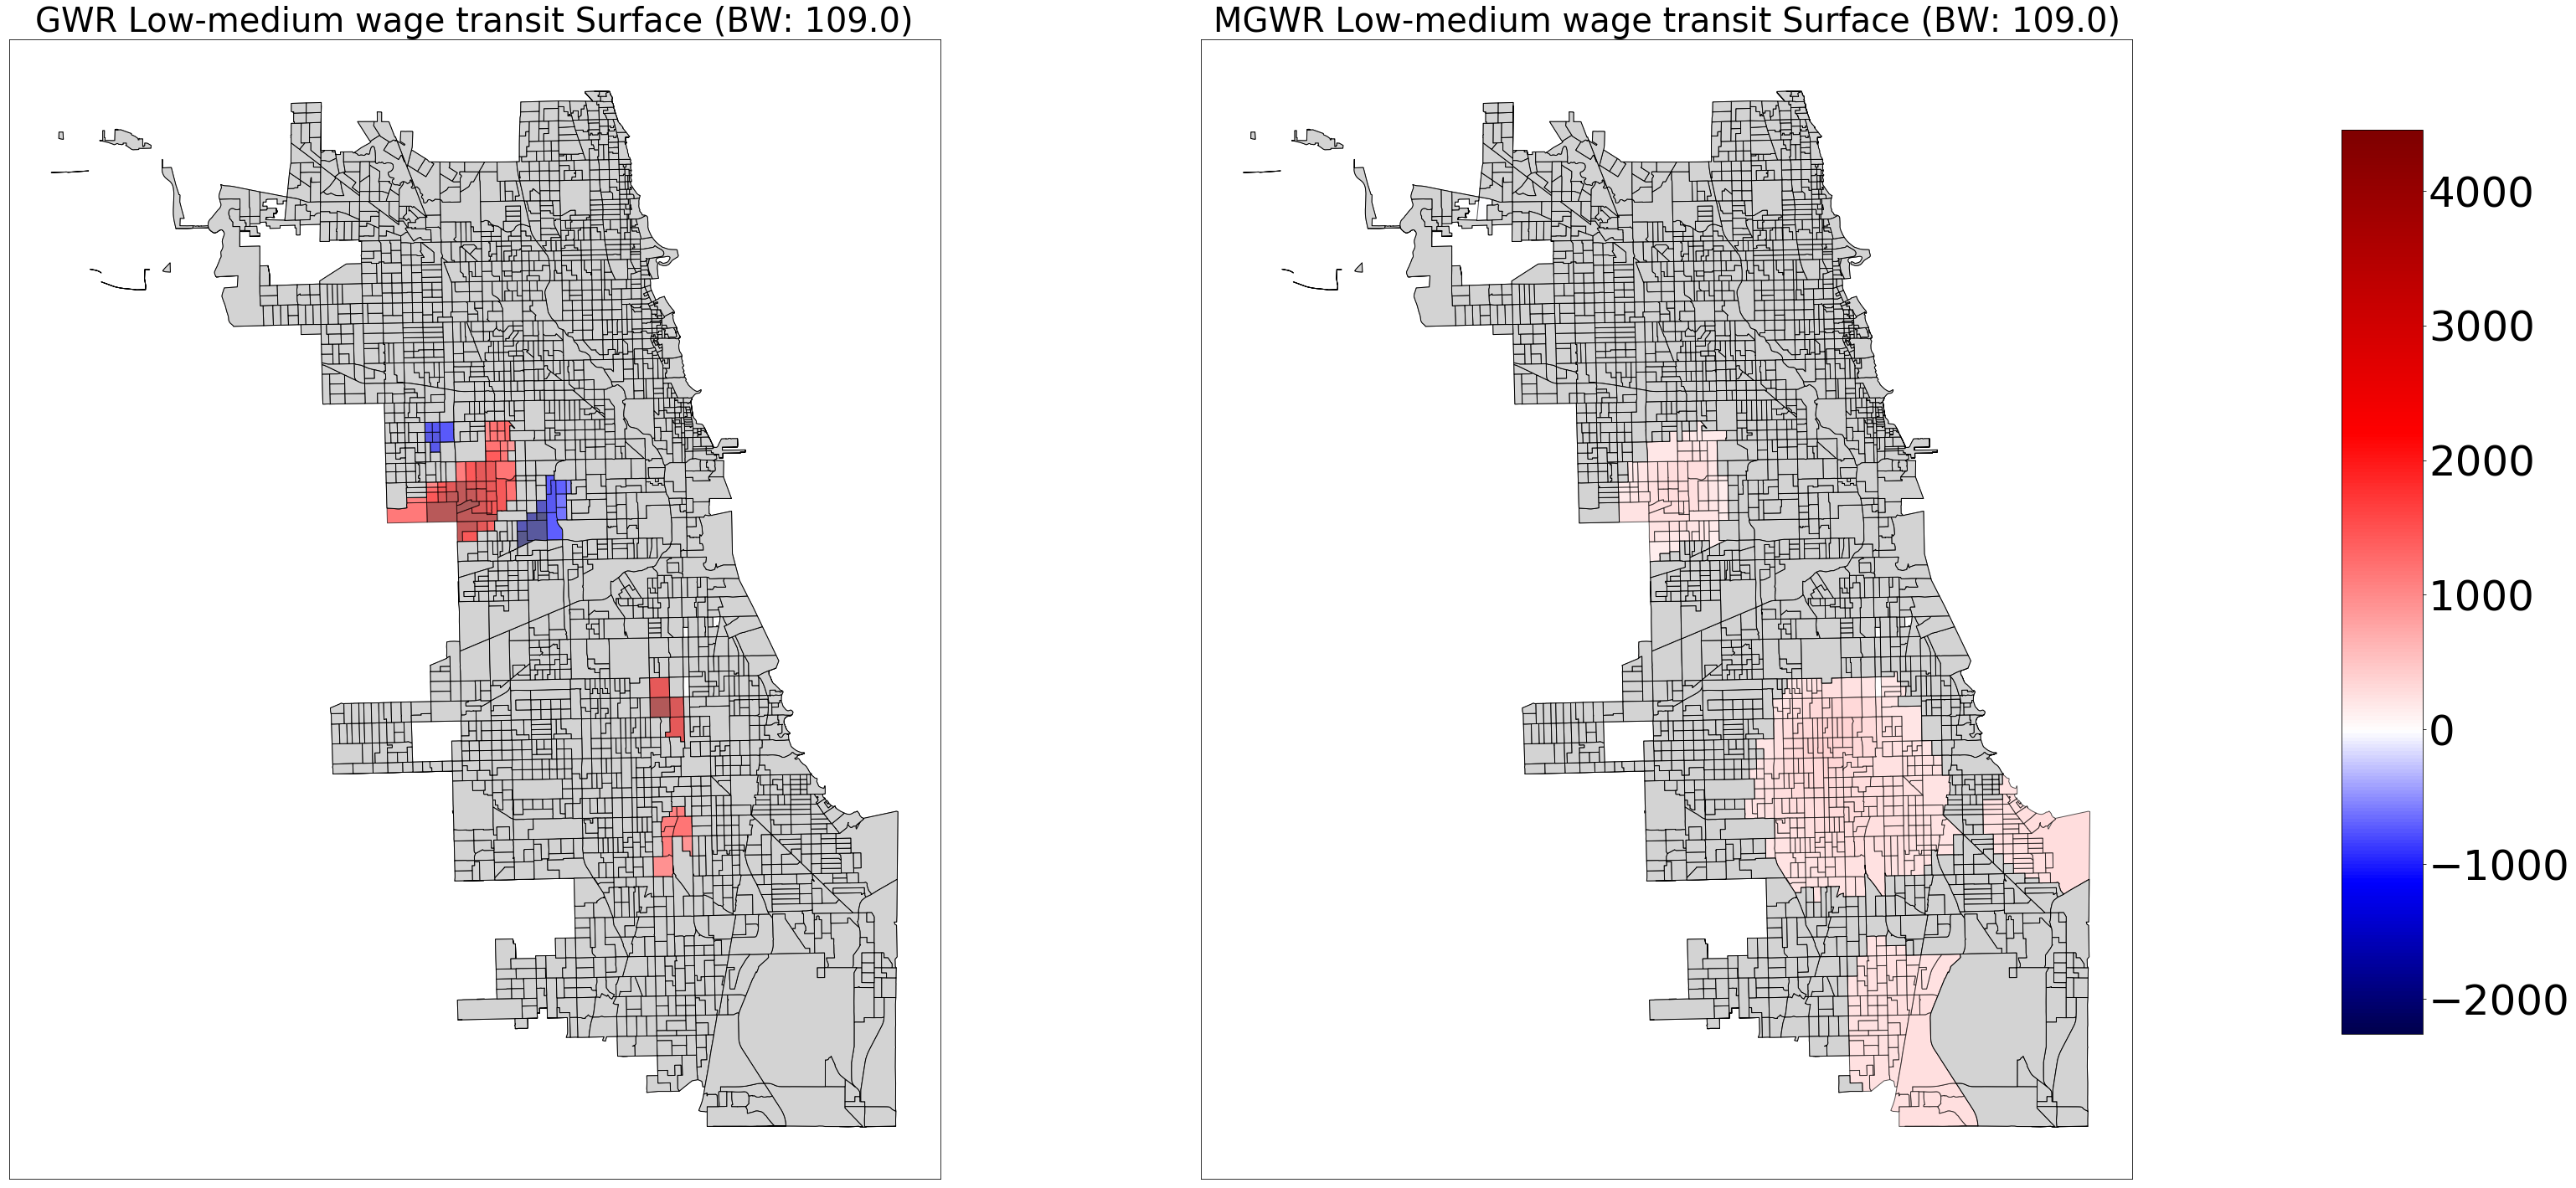

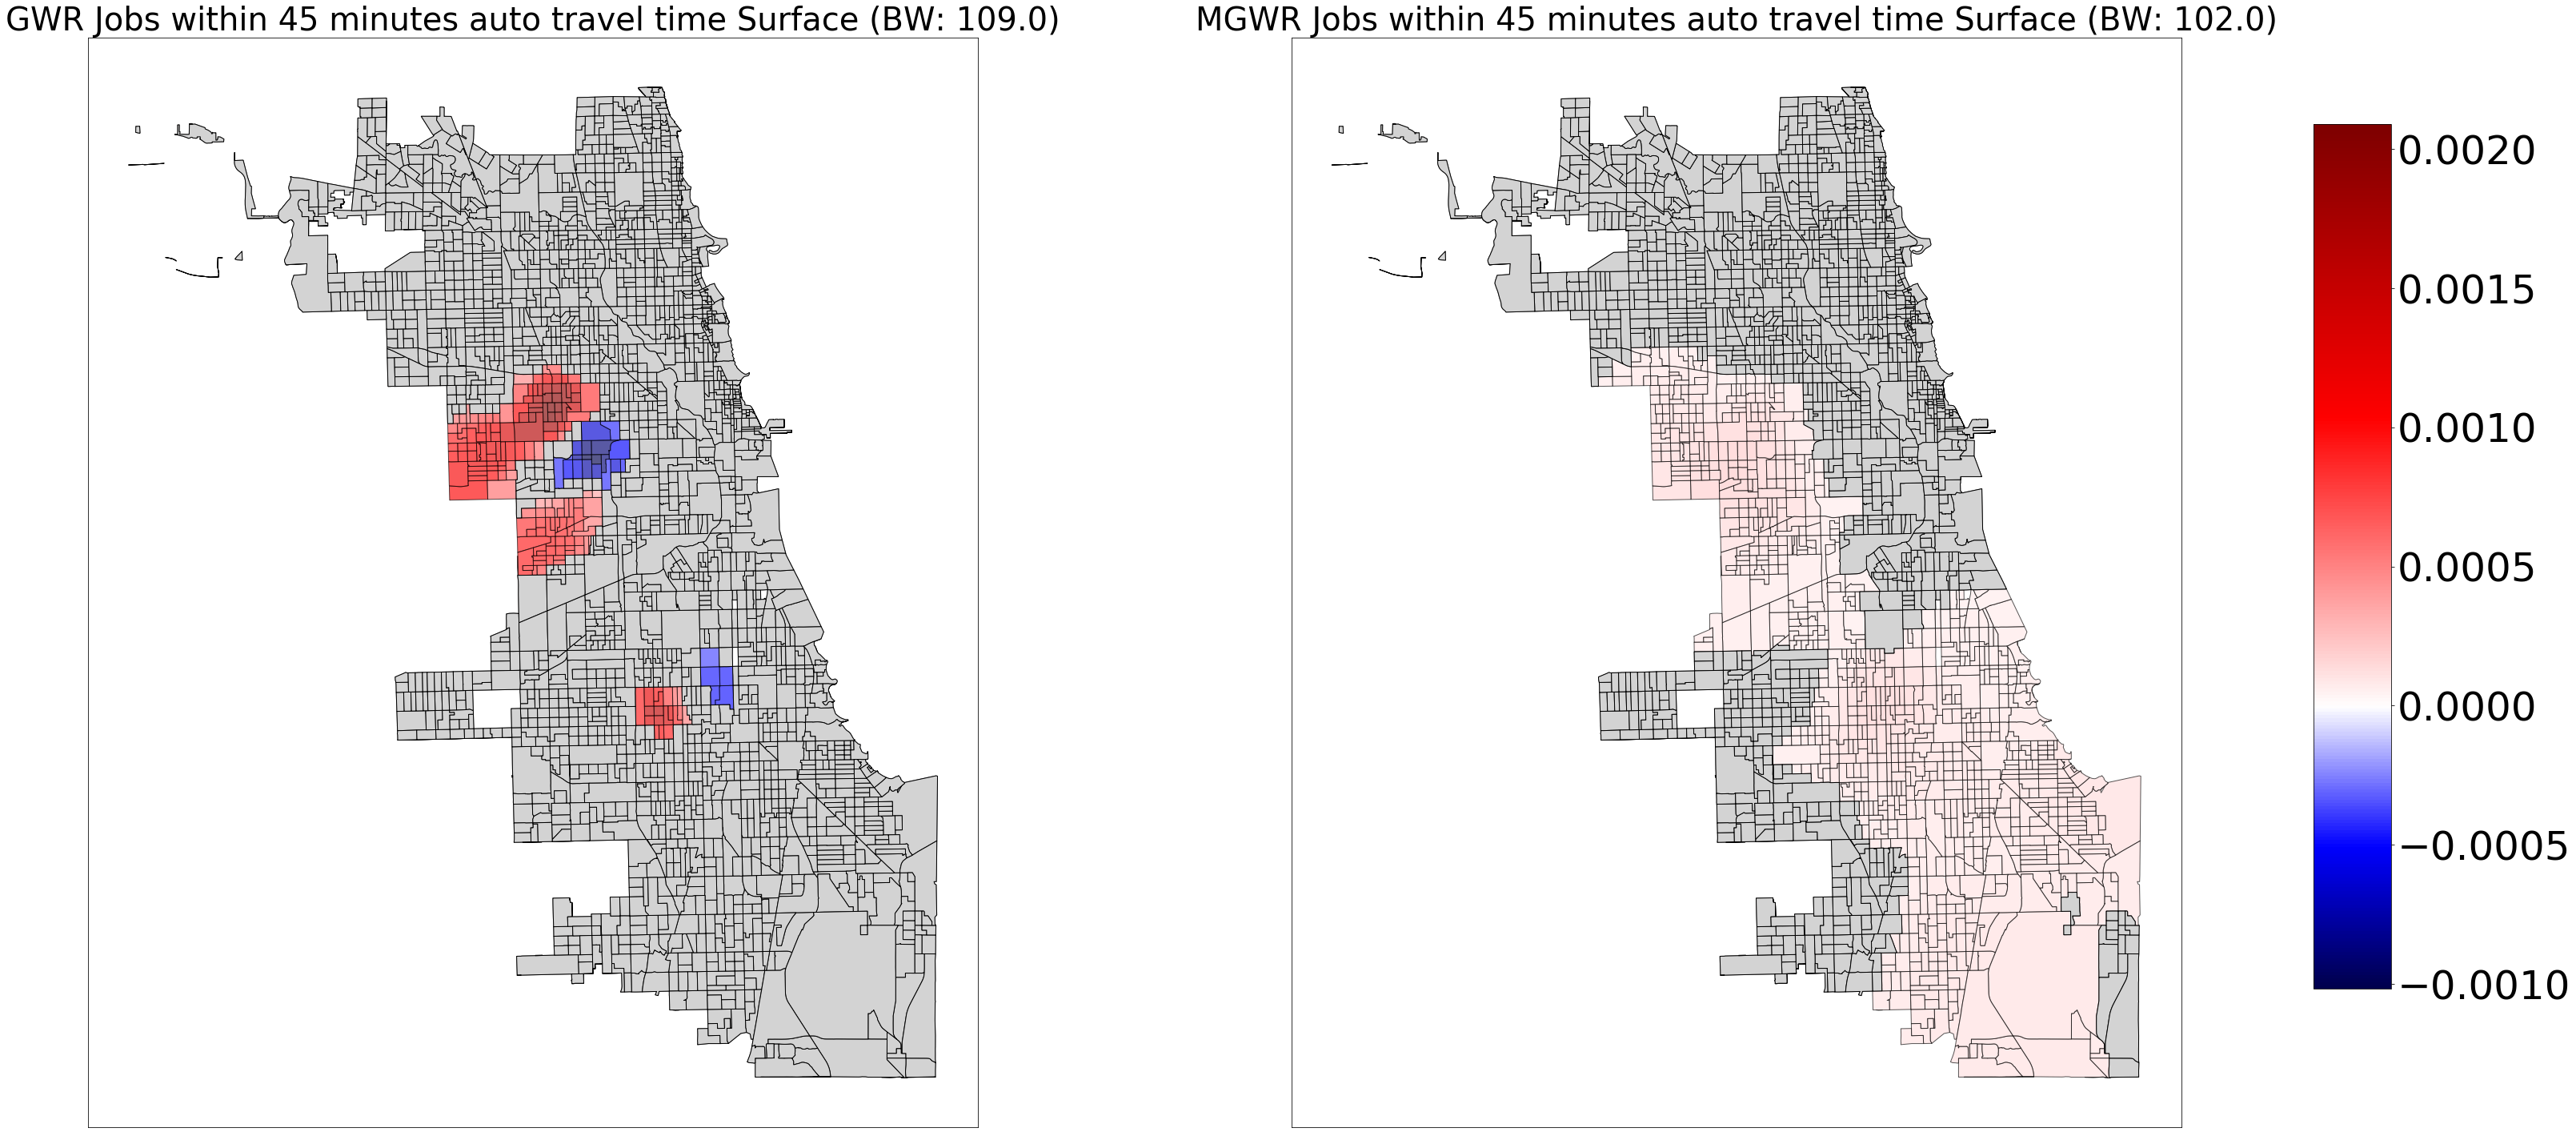

In [170]:

#Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()

kwargs1 = {'edgecolor':'black', 'alpha':.65}
kwargs2 = {'edgecolor':'black'}

compare(chicago_variable, 'gwr_intercept', 'mgwr_intercept', gwr_filtered_t[:,0],
        gwr_bw, mgwr_filtered_t[:,0], mgwr_bw[0], 'Intercept', kwargs1, kwargs2)

compare(chicago_variable, 'gwr_VacLot', 'mgwr_VacLot', gwr_filtered_t[:,1], 
        gwr_bw, mgwr_filtered_t[:,1], mgwr_bw[1], 'Vacant Lot', kwargs1, kwargs2)

compare(chicago_variable, 'gwr_ParkingLot', 'mgwr_ParkingLot', gwr_filtered_t[:,2],
        gwr_bw, mgwr_filtered_t[:,2], mgwr_bw[2], 'Parking Lot', kwargs1, kwargs2)

compare(chicago_variable, 'gwr_PBachelorHigher', 'mgwr_PBachelorHigher', gwr_filtered_t[:,3], 
        gwr_bw, mgwr_filtered_t[:,3], mgwr_bw[3], 'Education', kwargs1, kwargs2)

compare(chicago_variable, 'gwr_Pct_LoMeWg', 'mgwr_Pct_LoMeWg', gwr_filtered_t[:,4],
        gwr_bw, mgwr_filtered_t[:,4], mgwr_bw[4], 'Low-medium wage transit', kwargs1, kwargs2)

compare(chicago_variable, 'gwr_D5ar', 'mgwr_D5ar', gwr_filtered_t[:,5], 
        gwr_bw, mgwr_filtered_t[:,5], mgwr_bw[5], 'Jobs within 45 minutes auto travel time', kwargs1, kwargs2)